<a href="https://colab.research.google.com/github/kireayom16/classfiles/blob/main/PRACTICA18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


df = pd.read_csv('/content/drive/MyDrive/classfiles/unidad2/AirQuality.csv',  sep=';',  decimal=',', na_values='-200' )


print(df)
#imprimir datos faltantes
print(df.isnull().sum())


            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1        

In [53]:

# Eliminar las últimas 2 columnas que están completamente vacías
df = df.iloc[:, :-2]
# Eliminar filas donde 'Date' o 'Time' son nulos, ya que son esenciales
df.dropna(subset=['Date', 'Time'], how='all', inplace=True)
# Combinar Date y Time en una sola columna y convertirla a formato datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')
# Eliminar filas donde la conversión a datetime falló
df.dropna(subset=['DateTime'], inplace=True)
# Establecer DateTime como el índice del DataFrame
df.set_index('DateTime', inplace=True)
# Eliminar las columnas originales de Date y Time
df.drop(['Date', 'Time'], axis=1, inplace=True)


In [54]:
# --- Creación de variables categóricas a partir del índice ---
df['DayOfWeek'] = df.index.day_name()
df['Month'] = df.index.month_name()
df['Hour'] = df.index.hour


In [55]:
# Separar columnas numéricas y categóricas

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Hour' in numeric_cols:
    numeric_cols.remove('Hour')
categorical_cols = ['DayOfWeek', 'Month', 'Hour']

In [56]:
print("Limpieza y preparación de datos completada.")
print("\nPorcentaje de valores faltantes ANTES de la imputación:")
print((df[numeric_cols].isnull().sum() / len(df) * 100).round(2))

Limpieza y preparación de datos completada.

Porcentaje de valores faltantes ANTES de la imputación:
CO(GT)           17.99
PT08.S1(CO)       3.91
NMHC(GT)         90.23
C6H6(GT)          3.91
PT08.S2(NMHC)     3.91
NOx(GT)          17.52
PT08.S3(NOx)      3.91
NO2(GT)          17.55
PT08.S4(NO2)      3.91
PT08.S5(O3)       3.91
T                 3.91
RH                3.91
AH                3.91
dtype: float64


In [57]:
#3. EDA (ANÁLISIS EXPLORATORIO) - ANTES DE LA IMPUTACIÓN
print("\nDescripción estadística :")
print(df[numeric_cols].describe())


Descripción estadística :
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.453252   217.080037   204.459921     7.449820     266.831429   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     212.979168    256.817320    48.370108    346.206794 

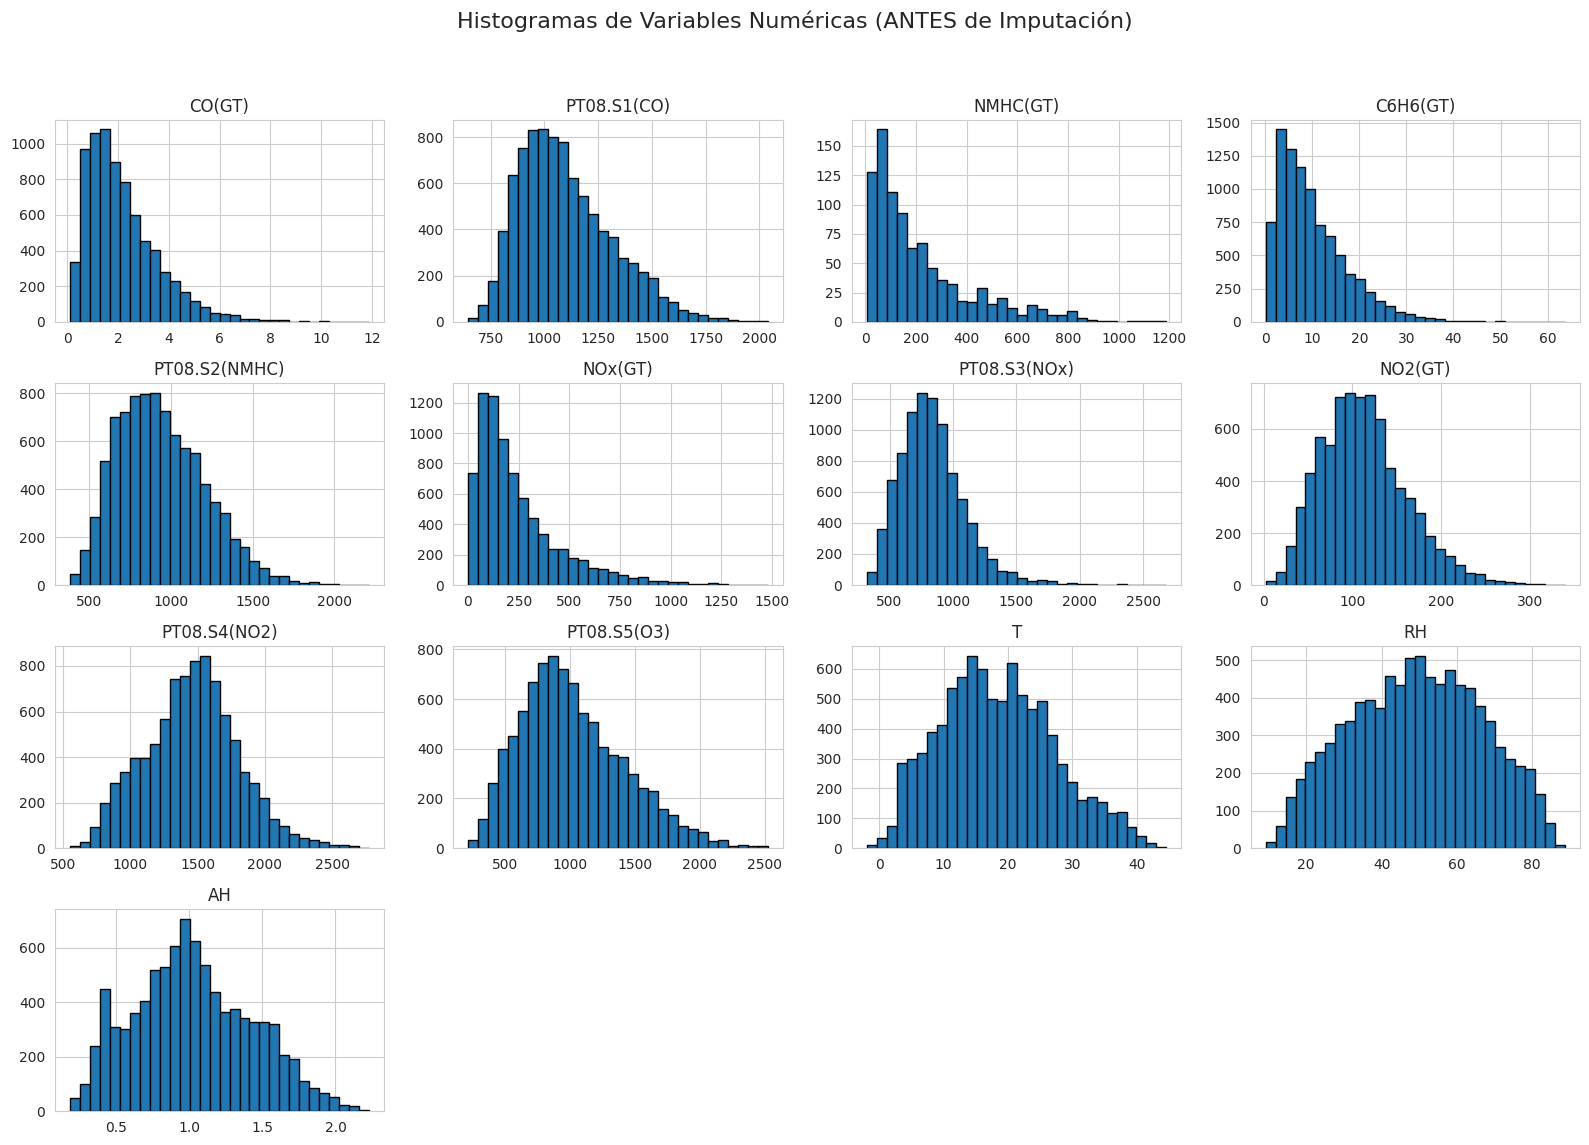

In [58]:

# Histogramas
df[numeric_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Histogramas de Variables Numéricas (ANTES de Imputación)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

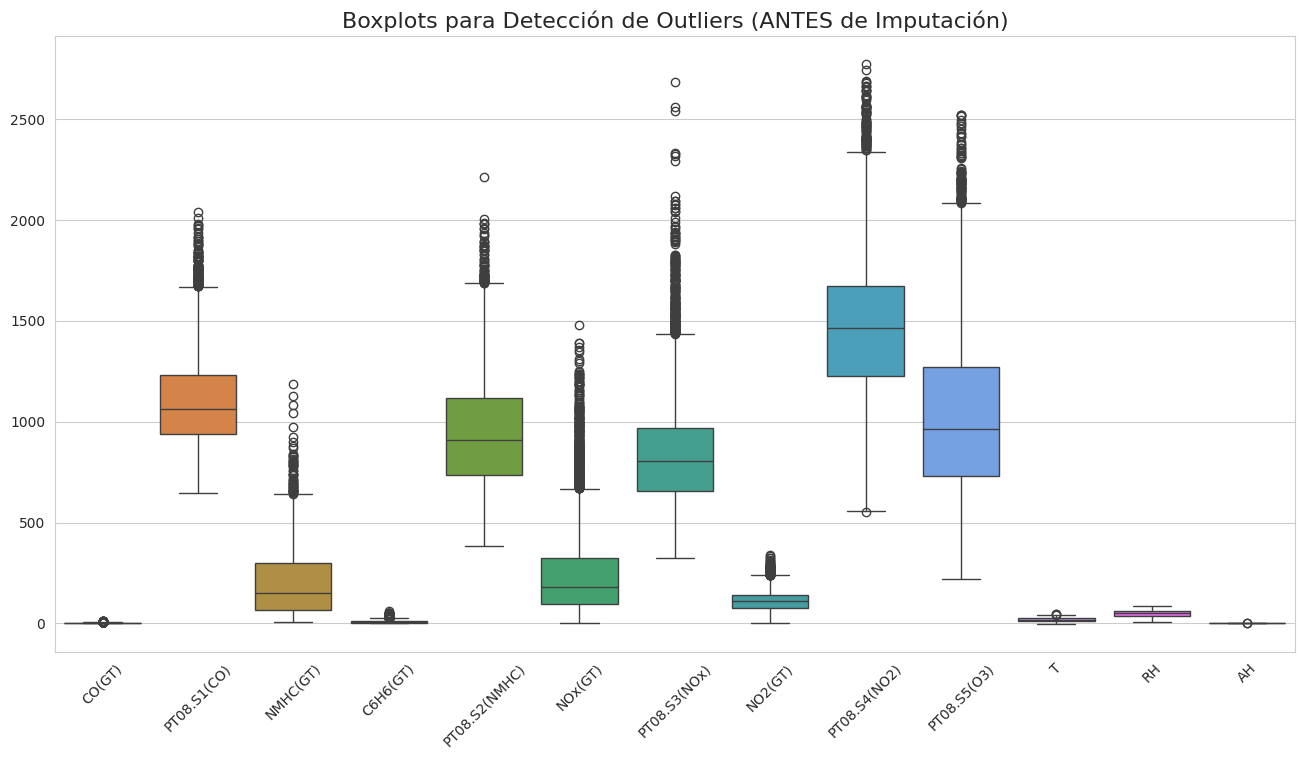

In [59]:
# Boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots para Detección de Outliers (ANTES de Imputación)", fontsize=16)
plt.xticks(rotation=45)
plt.show()

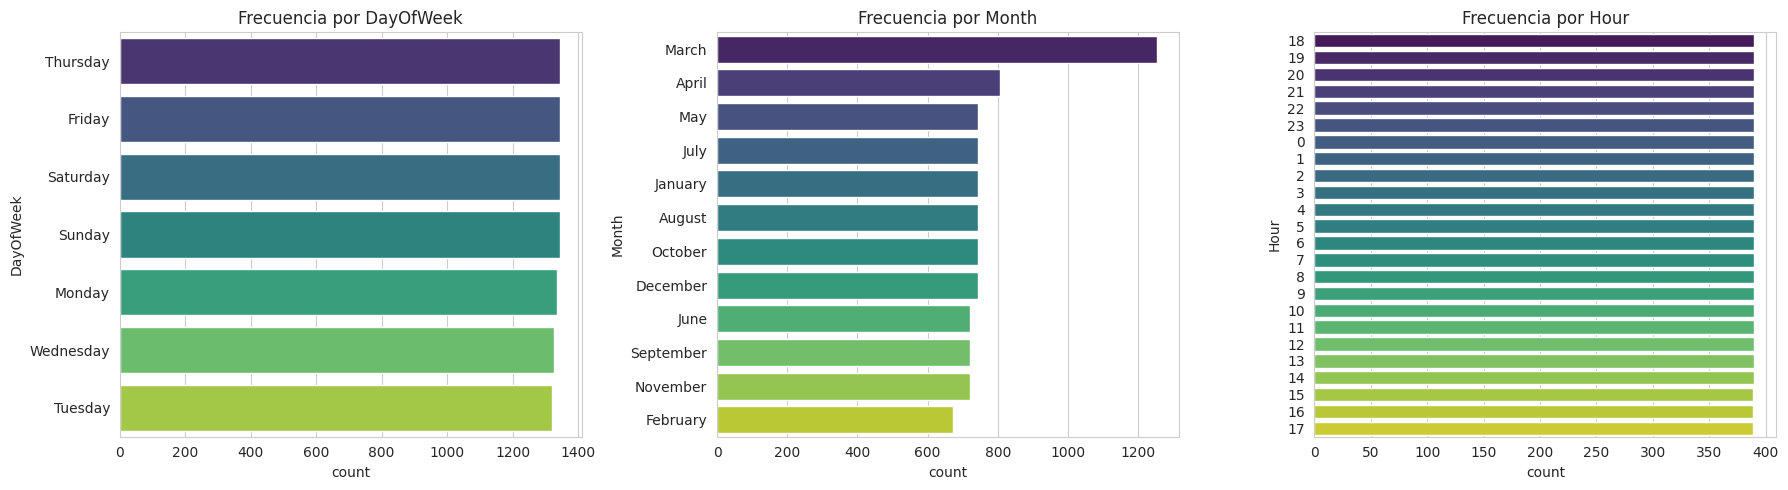

In [60]:

# --- Gráficas de Barras
plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frecuencia por {col}')
plt.tight_layout()
plt.show()

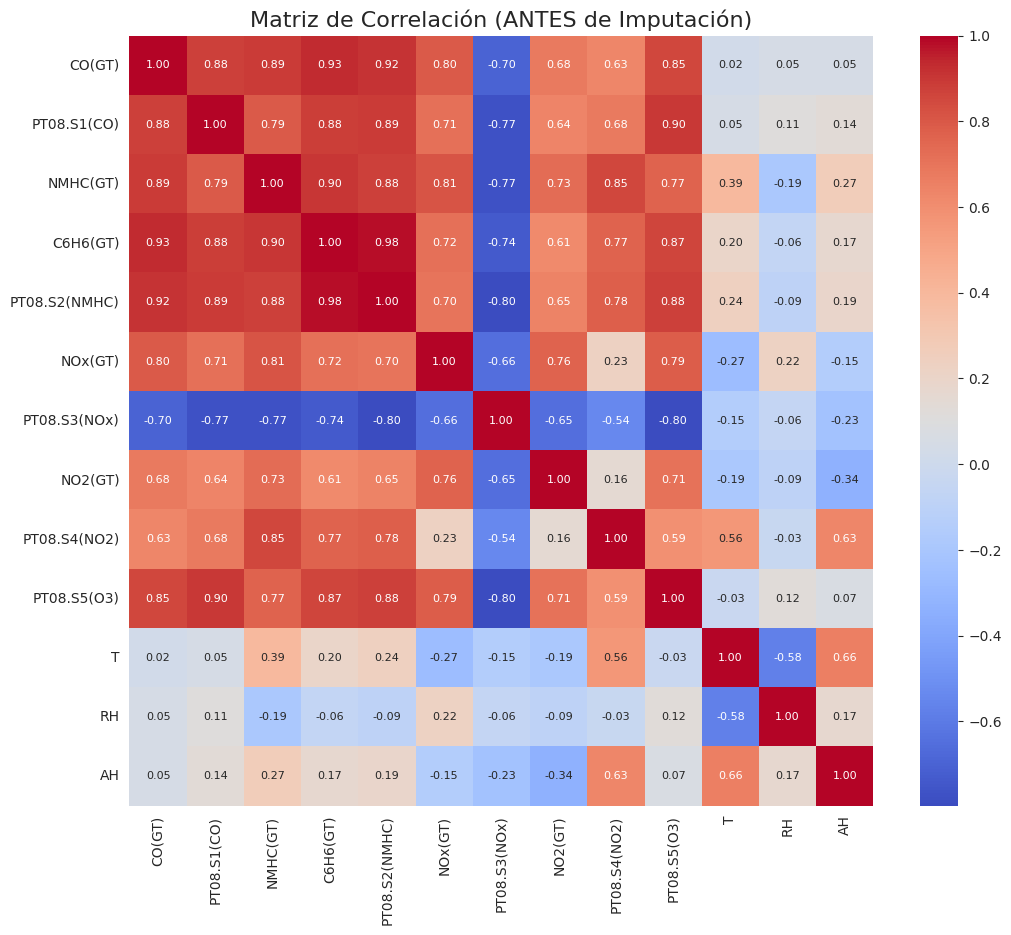

In [61]:


# --- Matriz de Correlación
plt.figure(figsize=(12, 10))
corr_before = df[numeric_cols].corr()
sns.heatmap(corr_before, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title("Matriz de Correlación (ANTES de Imputación)", fontsize=16)
plt.show()

In [62]:
#4. TRATAMIENTO DE DATOS FALTANTES
df_imputed = df.copy()
for col in numeric_cols:
    median_value = df_imputed[col].median()
    df_imputed[col].fillna(median_value, inplace=True)


print("\nValores faltantes DESPUÉS de la imputación:")
print(df_imputed[numeric_cols].isnull().sum())


Valores faltantes DESPUÉS de la imputación:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [63]:
# 5. EDA (ANÁLISIS EXPLORATORIO) - DESPUÉS DE LA IMPUTACIÓN
print("\nDescripción estadística (DESPUÉS):")
print(df_imputed[numeric_cols].describe())


Descripción estadística (DESPUÉS):
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      2.089302  1098.392433   156.721599    10.009447     937.973923   
std       1.323024   212.911465    67.058156     7.311771     261.625561   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.200000   941.000000   150.000000     4.600000     743.000000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.600000  1221.000000   150.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    235.178903    834.339959   112.373303   1456.528054  1020.562894   
std     195.091025    251.808888    43.948519    33

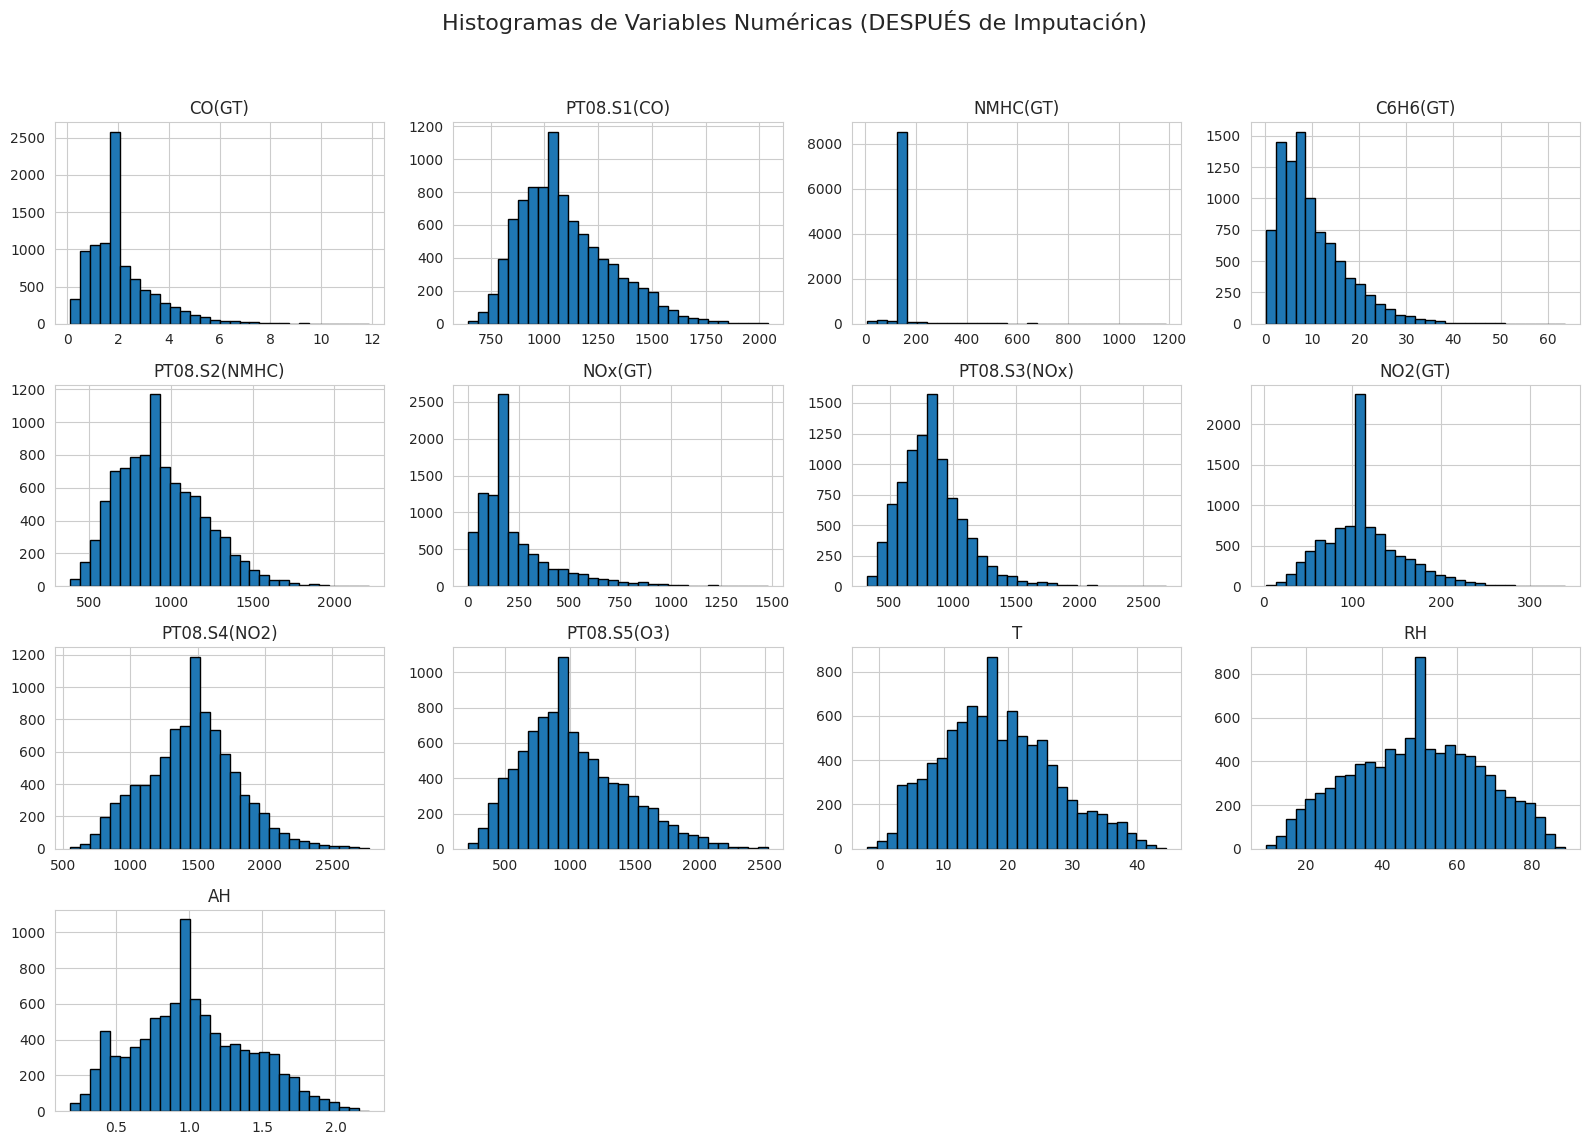

In [64]:
# Histogramas
df_imputed[numeric_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Histogramas de Variables Numéricas (DESPUÉS de Imputación)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

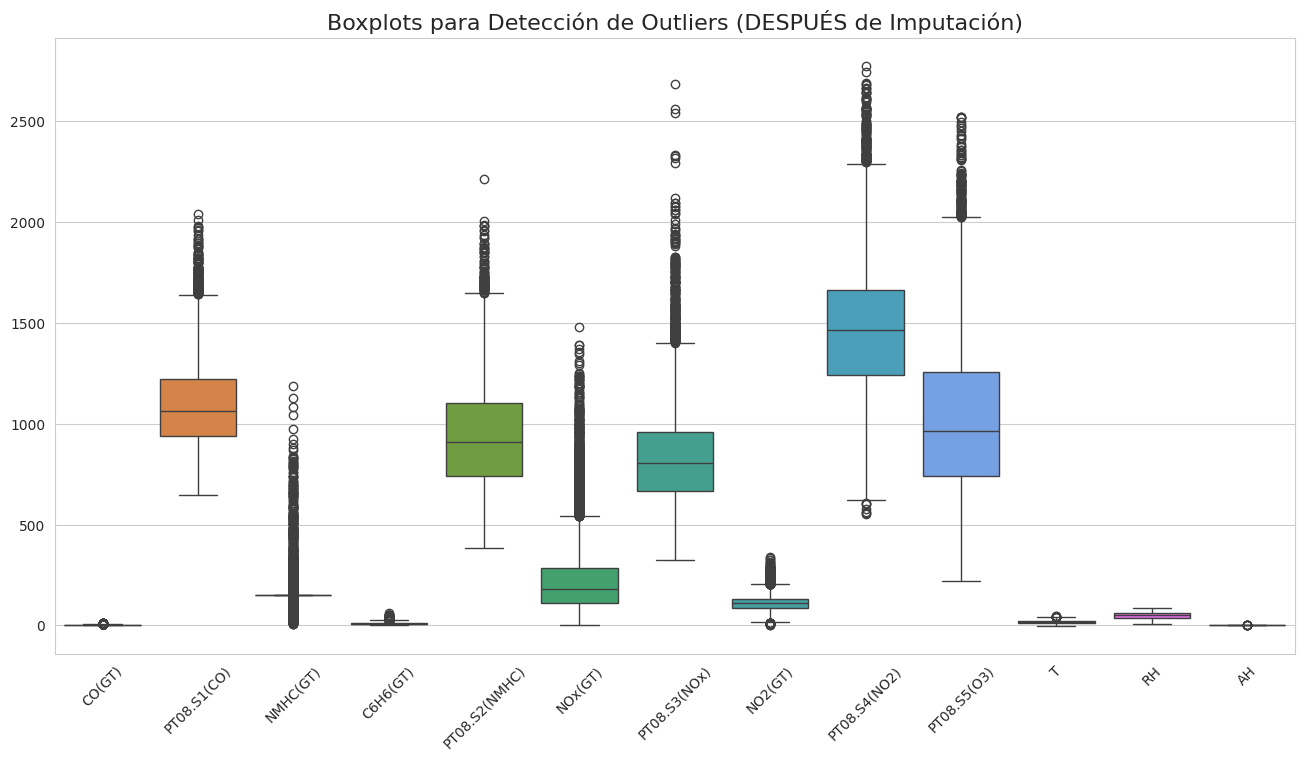

In [65]:
# Boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_imputed[numeric_cols])
plt.title("Boxplots para Detección de Outliers (DESPUÉS de Imputación)", fontsize=16)
plt.xticks(rotation=45)
plt.show()

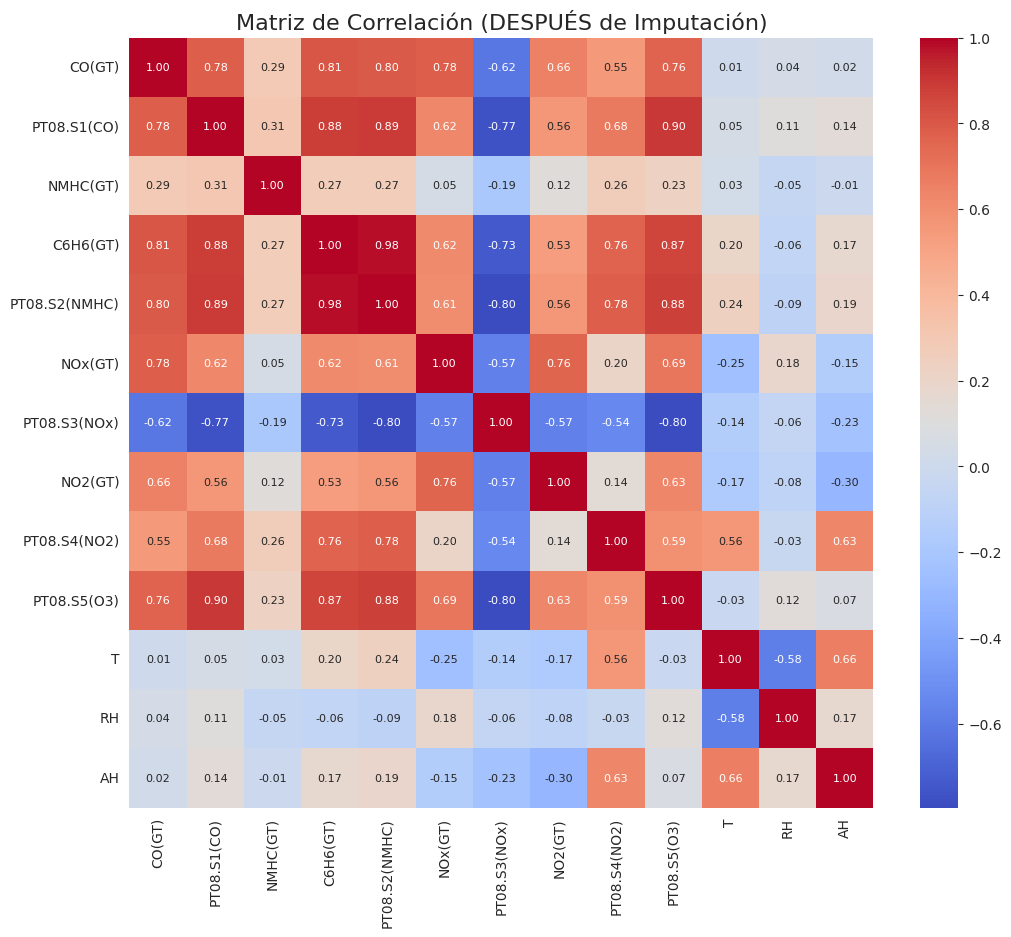

In [66]:
# Matriz de Correlación
plt.figure(figsize=(12, 10))
corr_after = df_imputed[numeric_cols].corr()
sns.heatmap(corr_after, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title("Matriz de Correlación (DESPUÉS de Imputación)", fontsize=16)
plt.show()



Variable: CO(GT)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


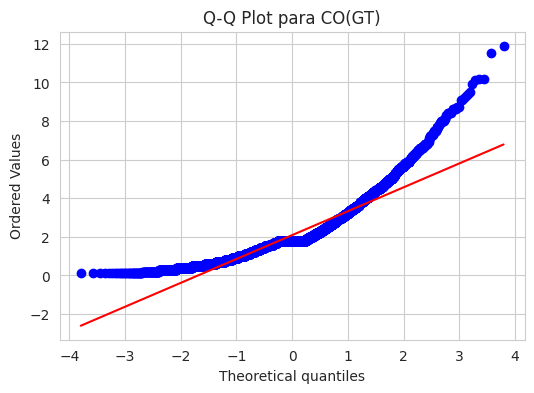


Variable: PT08.S1(CO)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


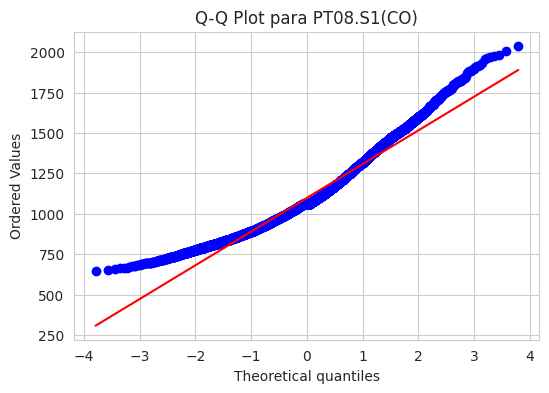


Variable: NMHC(GT)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


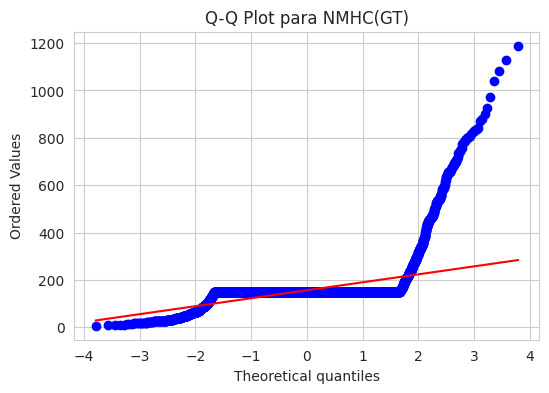


Variable: C6H6(GT)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


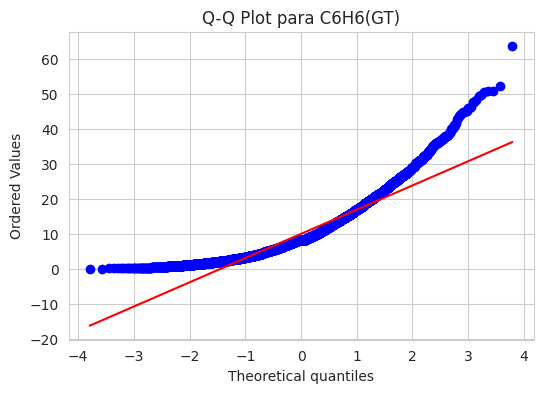


Variable: PT08.S2(NMHC)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


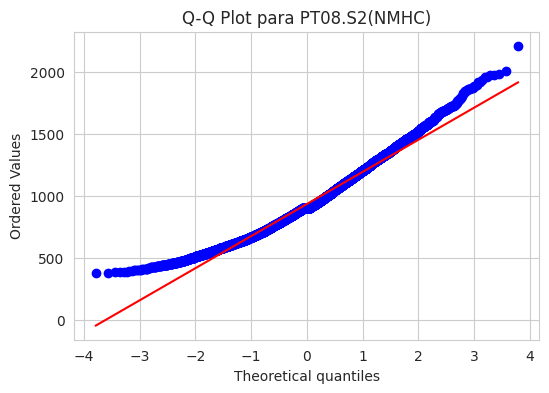


Variable: NOx(GT)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


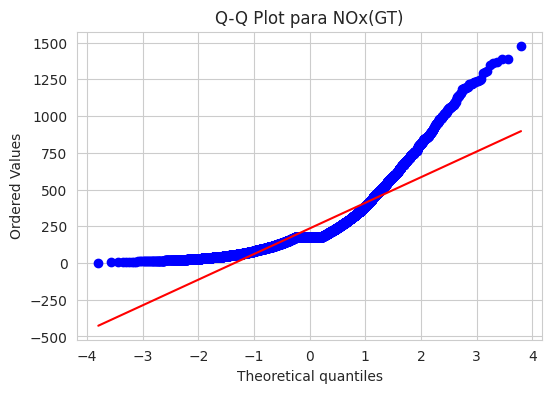


Variable: PT08.S3(NOx)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


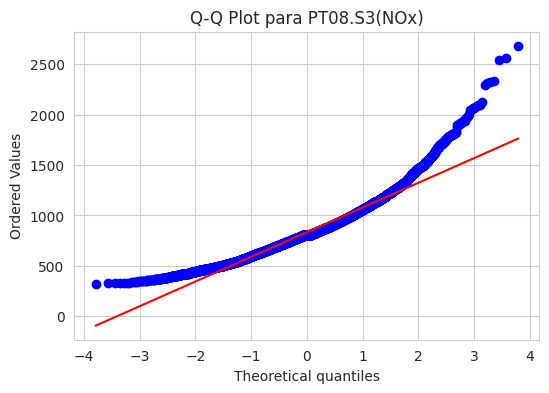


Variable: NO2(GT)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


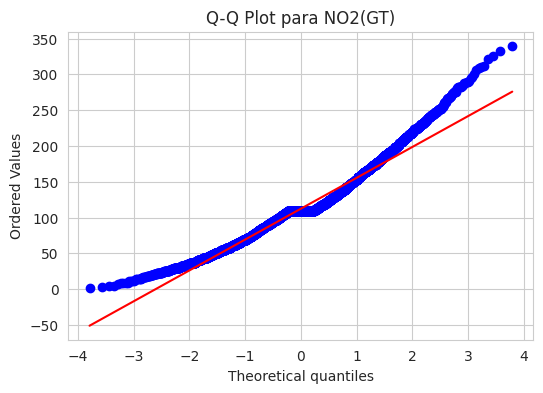


Variable: PT08.S4(NO2)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


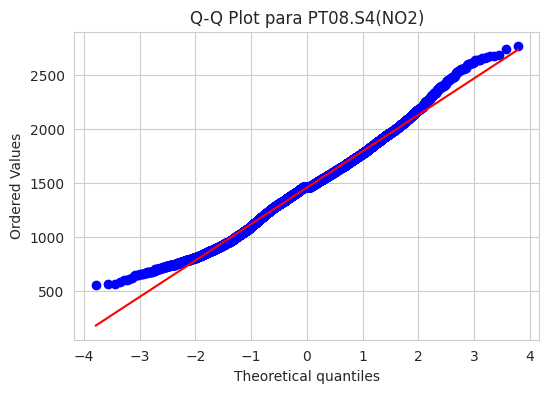


Variable: PT08.S5(O3)
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


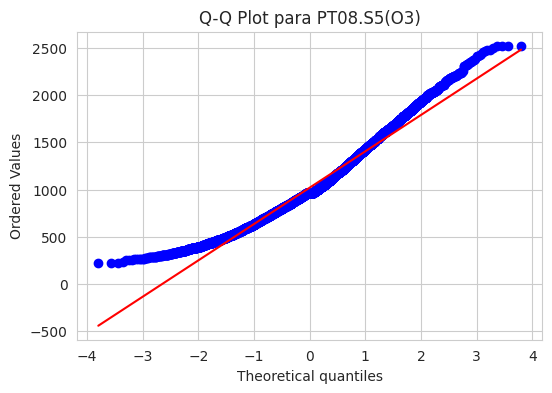


Variable: T
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


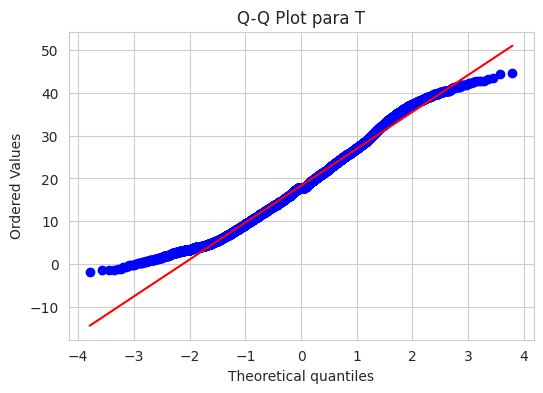


Variable: RH
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


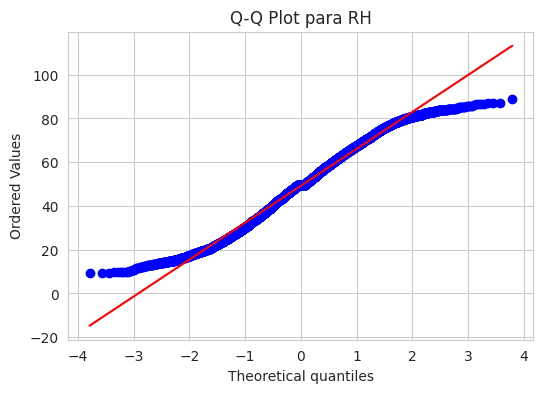


Variable: AH
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


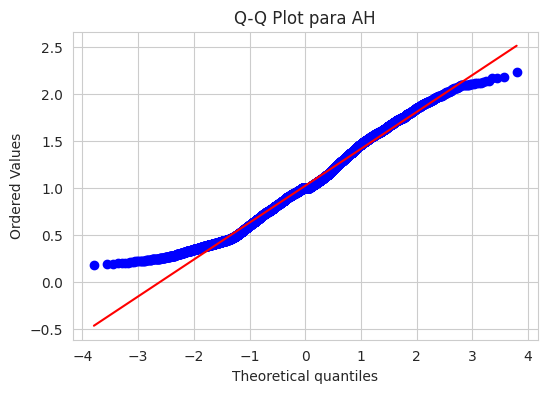

In [67]:
# 6. PRUEBAS DE NORMALIDAD Y QQ-PLOTS

alpha = 0.05
for col in numeric_cols:
    data_sample = df_imputed[col].sample(n=min(len(df_imputed)-1, 4999))
    stat, p_shapiro = stats.shapiro(data_sample)

    print(f"\nVariable: {col}")
    print(f'Prueba de Shapiro-Wilk: p-value = {p_shapiro:.4f}')
    if p_shapiro > alpha:
        print("  -> Conclusión: La muestra parece provenir de una distribución Normal.")
    else:
        print("  -> Conclusión: La muestra NO parece provenir de una distribución Normal.")

# QQ-Plot
    plt.figure(figsize=(6, 4))
    stats.probplot(df_imputed[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot para {col}')
    plt.show()
